# Importar librerias y configuraciones 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.ticker as ticker
from scipy.stats import linregress
from scipy.stats import spearmanr
import scipy
import scipy.cluster.hierarchy as sch

# Set the default language for Matplotlib to Spanish
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 12
plt.rcParams['axes.labelweight'] = 'bold'

## Importar base de datos

In [24]:
df = pd.read_csv(r'D:\Documents\Documents\academico\tesis_maie\data_sets\dataframe\dataframe_tesis_final_correcciones.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lote              33 non-null     object 
 1   Año               33 non-null     int64  
 2   DSM               33 non-null     float64
 3   EVAPO             33 non-null     float64
 4   PP                33 non-null     float64
 5   TEMP              33 non-null     float64
 6   GNDVI_mean        33 non-null     float64
 7   GNDVI_stde        33 non-null     float64
 8   GNDVI_range       33 non-null     float64
 9   NDRE_mean         33 non-null     float64
 10  NDRE_stde         33 non-null     float64
 11  NDRE_range        33 non-null     float64
 12  NDVI_mean         33 non-null     float64
 13  NDVI_stde         33 non-null     float64
 14  NDVI_range        33 non-null     float64
 15  OSAVI_mean        33 non-null     float64
 16  OSAVI_stde        33 non-null     float64
 17 

## Analisis de la variable independiente 

### Histograma

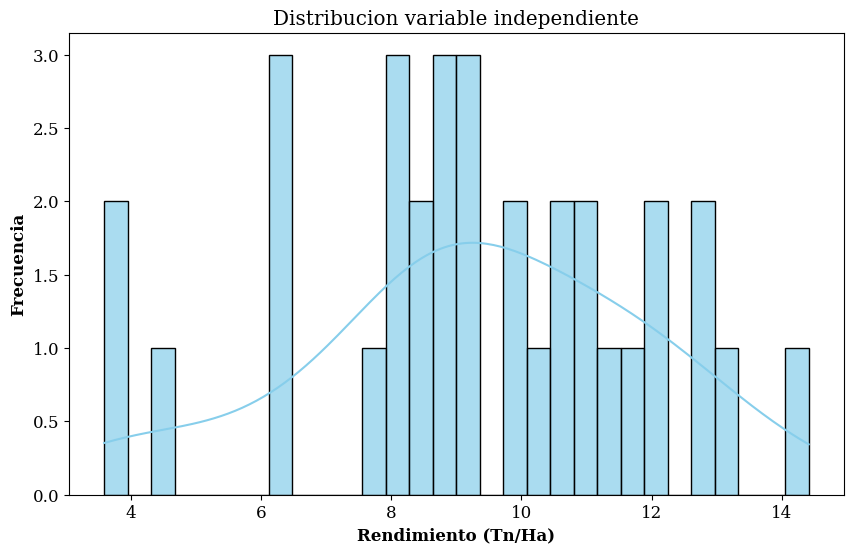

In [12]:
# Select the independent variable (Año) for analysis
independent_variable = 'REND_mean'

# Filter out rows with missing values in the selected independent variable
data = df.dropna(subset=[independent_variable])

# Convert the independent variable column to the appropriate data type (float)
data[independent_variable] = data[independent_variable].astype(float)

# Descriptive statistics
statistics = data[independent_variable].describe()

# Distribution plot
plt.figure(figsize=(10, 6))
#sns.histplot(data=data, x=independent_variable, bins=10, kde=True)
sns.histplot(data=data, x=independent_variable, bins=30, color='skyblue', edgecolor='black', alpha=0.7 , kde=True )#, kde_kws={'color': 'black'})
plt.title(f'Distribucion variable independiente')
plt.xlabel('Rendimiento (Tn/Ha)')
plt.ylabel('Frecuencia')
plt.show()

### Test de normalidad Shapiro-Wilk

In [13]:
from scipy.stats import shapiro
stat, p = shapiro(data[independent_variable])
print(f"Shapiro-Wilk test p-value: {p}")
if p > 0.05:
    print(f"{independent_variable} appears to be normally distributed.")
else:
    print(f"{independent_variable} does not appear to be normally distributed.")

# Example: T-test to compare means
from scipy.stats import ttest_ind
group1 = data[data[independent_variable] == 2016][independent_variable]
group2 = data[data[independent_variable] == 2017][independent_variable]
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-test p-value: {p_value}")
if p_value < 0.05:
    print(f"There is a significant difference in means between 2016 and 2017.")
else:
    print(f"No significant difference in means between 2016 and 2017.")

Shapiro-Wilk test p-value: 0.6197720766067505
REND_mean appears to be normally distributed.
T-test p-value: nan
No significant difference in means between 2016 and 2017.


### Boxplot 

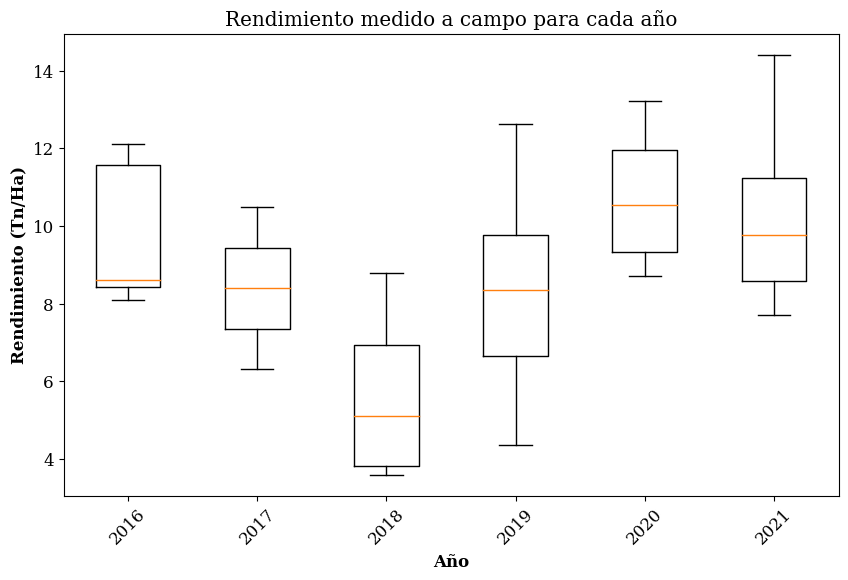

In [16]:
# Group the data by 'Año'
grouped = df.groupby('Año')

# Create an empty list to store the data for each year
data_to_plot = []

# Iterate over each group (each year) and extract the required columns
for year, group_data in grouped:
    rend_media = group_data['REND_mean']
    rend_stde = group_data['REND_stde']
    rend_range = group_data['REND_range']
    
    # Combine the data into a single DataFrame for the box plot
    combined_data = pd.DataFrame({'Year': year, 'REND_mean': rend_media, 'REND_stde': rend_stde, 'REND_range': rend_range})
    
    # Append the combined data to the list
    data_to_plot.append(combined_data)

# Create a box plot for each year using the 'Rend_media', 'Rend_stde', and 'Rend_var' variables
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Rendimiento medido a campo para cada año')
plt.xlabel('Año')
plt.ylabel('Rendimiento (Tn/Ha)')
#print(data_to_plot)
# Use the boxplot function to create the box plot
ax.boxplot([data['REND_mean'] for data in data_to_plot], labels=[str(year) for year in grouped.groups.keys()])
plt.xticks(rotation=45)

# Show the plot
plt.show()


##  Analisis de la variables predictoras

### Boxplot

In [17]:
# List of variables to create separate box plots for
variables_to_plot = ['GNDVI_mean', 'NDRE_mean', 'NDVI_mean', 'OSAVI_mean', 'RECI_mean', 'TCARIOSAVI_mean', 'TCARI_mean', 'SLOPE_mean']

# Create a mapping of variable names without the "_mean" suffix
variable_labels = {var: var.replace('_mean', '') for var in variables_to_plot}

# Group the data by 'Año'
grouped = df.groupby('Año')

# Create an empty list to store the data for each variable
data_to_plot = {var: [] for var in variables_to_plot}

# Iterate over each group (each year) and extract the required columns for each variable
for year, group_data in grouped:
    for var in variables_to_plot:
        variable_data = group_data[var]
        combined_data = pd.DataFrame({'Year': year, var: variable_data})
        data_to_plot[var].append(combined_data)

# Create and save separate figures for each variable
for var in variables_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f'{variable_labels[var]} de cada año')
    ax.set_xlabel('Año')
    ax.set_ylabel(variable_labels[var])  # Use the variable label without "_mean"

    # Use the boxplot function to create the box plot
    ax.boxplot([data[var] for data in data_to_plot[var]], labels=[str(year) for year in grouped.groups.keys()])
    ax.set_xticklabels([str(year) for year in grouped.groups.keys()], rotation=45)

    # Save the figure with a unique name
    fig.savefig(f'{variable_labels[var]}_boxplot.png')
    plt.close(fig)  # Close the current figure to avoid overlap

# Show the plots if needed
#plt.show()


### Histograma todas las variables

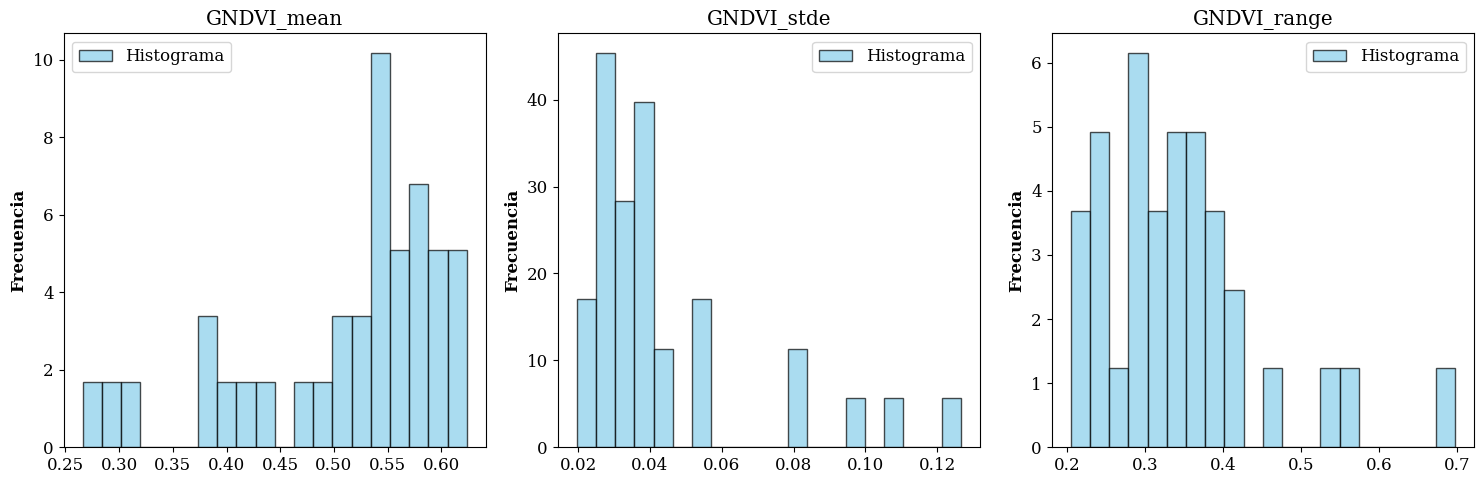

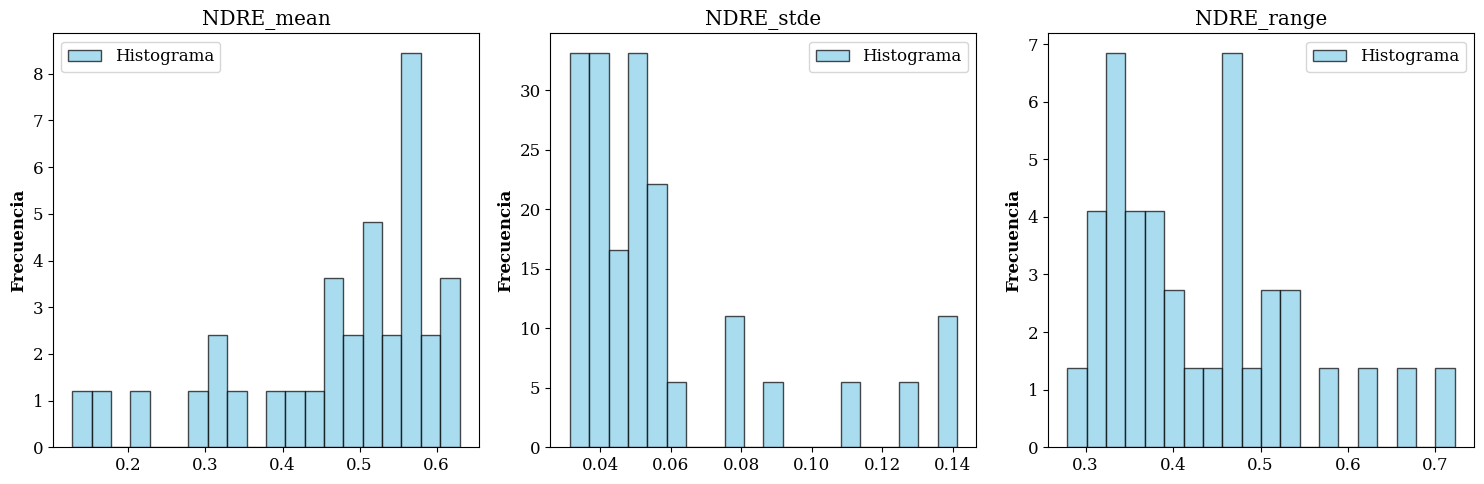

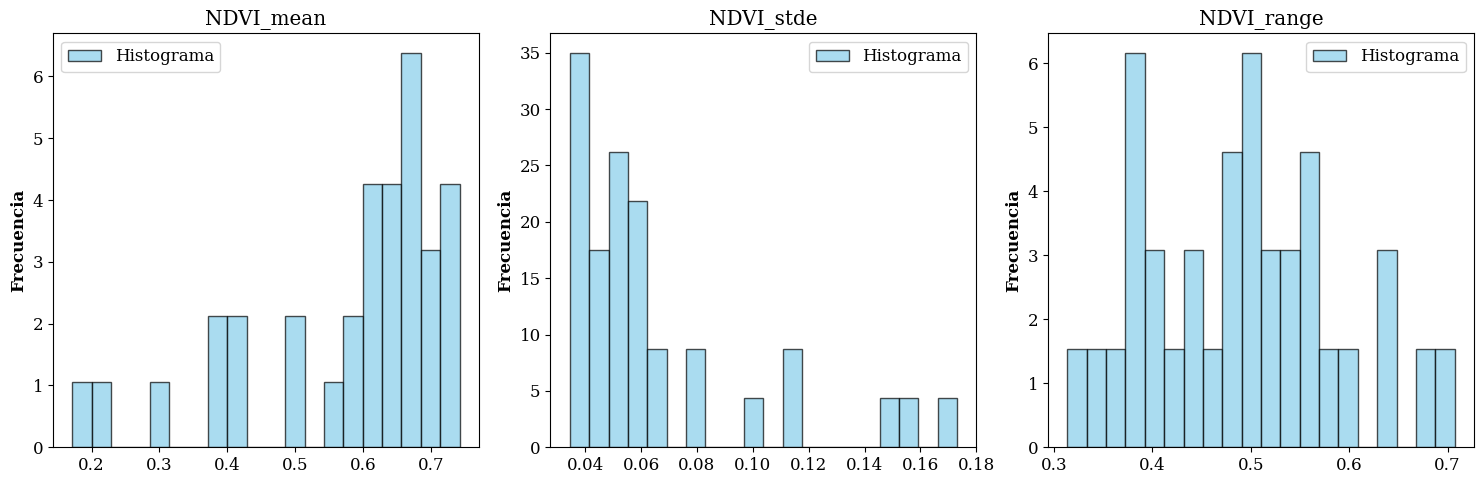

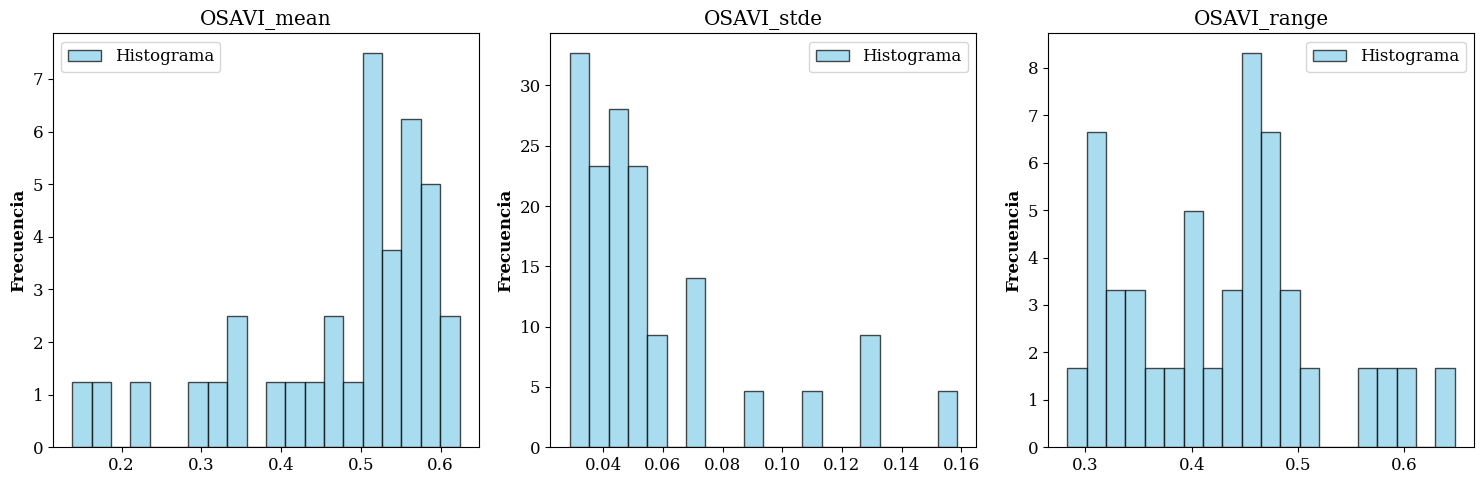

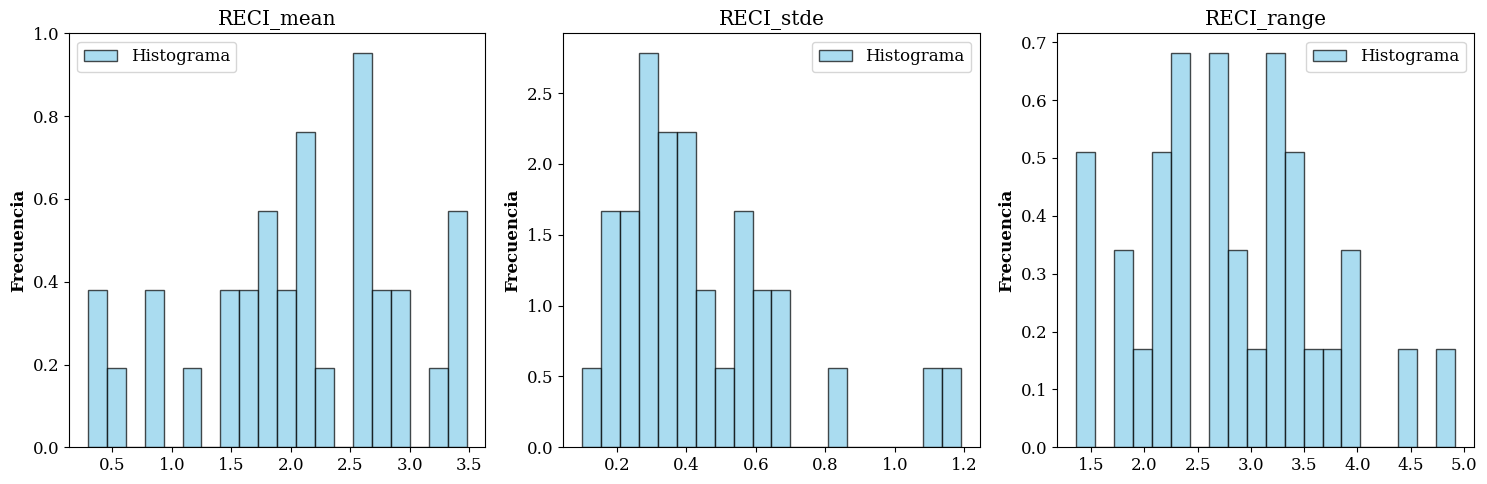

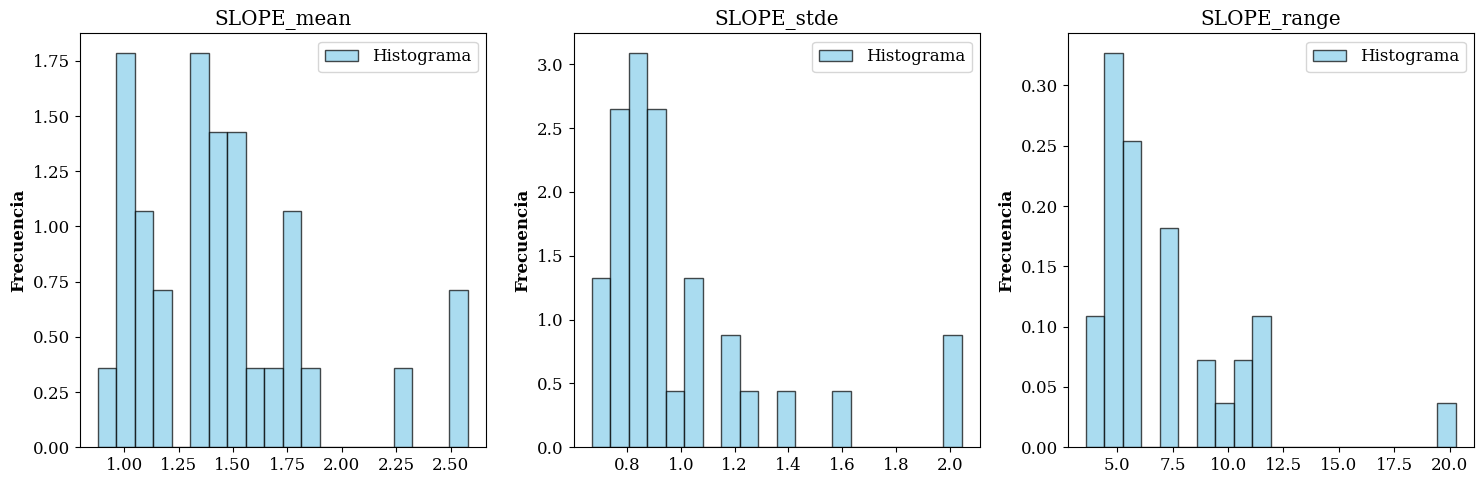

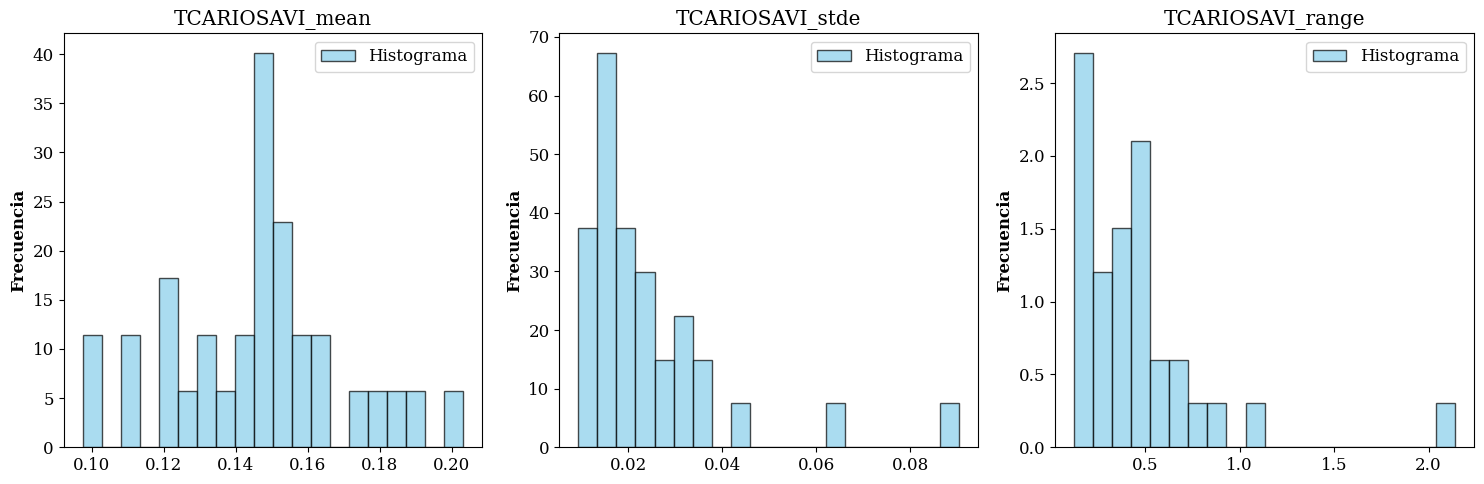

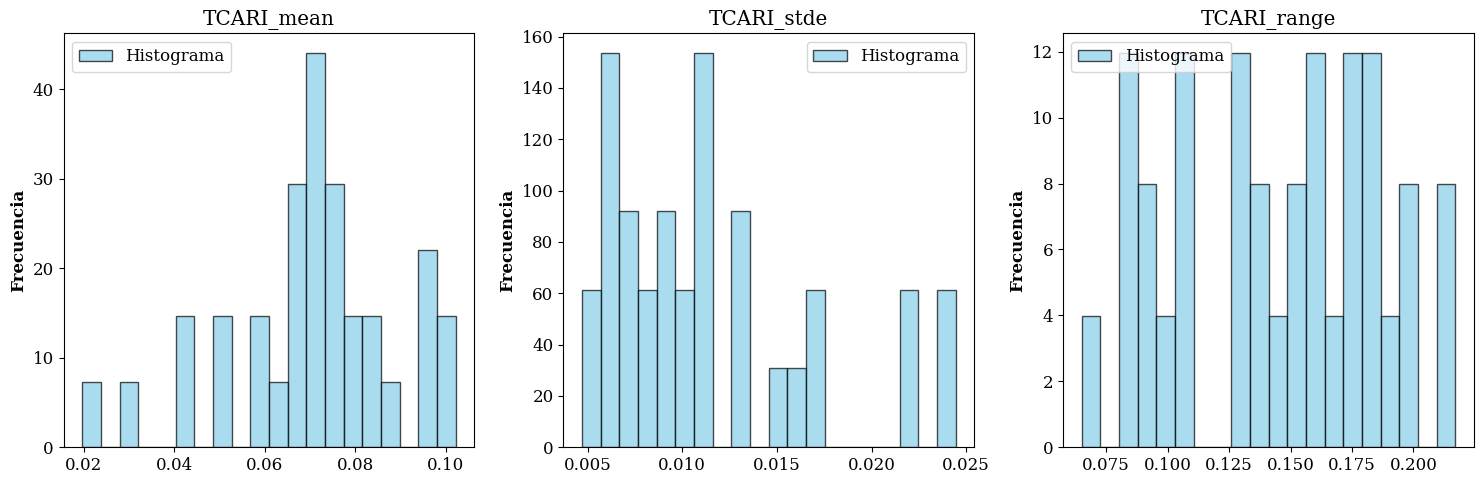

In [27]:
df = df.drop(columns = ["Año", "Lote","DSM", "EVAPO", "PP", "TEMP", "REND_mean", "REND_stde", "REND_range"])

# Define una función para generar los gráficos con la curva de distribución normal y el test de Shapiro-Wilk
def generate_histograms_with_normal_curve(group_df):
    # Selecciona las columnas del grupo
    group_columns = group_df.columns

    # Crea un nuevo subplot para cada columna
    fig, axes = plt.subplots(nrows=1, ncols=len(group_columns), figsize=(15, 5))

    # Genera un histograma y la curva de distribución normal para cada columna
    for i, col in enumerate(group_columns):
        data = group_df[col]
        
        # Histograma
        axes[i].hist(data, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='Histograma')
       
        
        # Curva de distribución normal
        #mean, std_dev = data.mean(), data.std()
        #x = np.linspace(data.min(), data.max(), 100)
        #pdf = stats.norm.pdf(x, mean, std_dev)
        #axes[i].plot(x, pdf, 'r-', label='Distribuion normal')
        
        # Test de Shapiro-Wilk
        stat, p_value = stats.shapiro(data)
        axes[i].set_title(col)
        #axes[i].set_title(f'{col}\nShapiro p-value: {p_value:.4f}')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia")
        axes[i].legend()

    # Ajusta el espacio entre los subplots
    plt.tight_layout()

# Agrupa las variables en grupos de tres
grouped_columns = [df.columns[i:i+3] for i in range(0, len(df.columns), 3)]

# Ordena cada grupo por la primera palabra del nombre de la variable
sorted_grouped_columns = []
for group_columns in grouped_columns:
    sorted_group_columns = sorted(group_columns, key=lambda x: x.split('_')[0])
    sorted_grouped_columns.append(sorted_group_columns)

# Genera los gráficos para cada grupo de tres variables con la curva de distribución normal y el test de Shapiro-Wilk
for group_columns in sorted_grouped_columns:
    group_df = df[group_columns]
    generate_histograms_with_normal_curve(group_df)

# Muestra los gráficos
plt.show()


### Histograma - variables climáticas

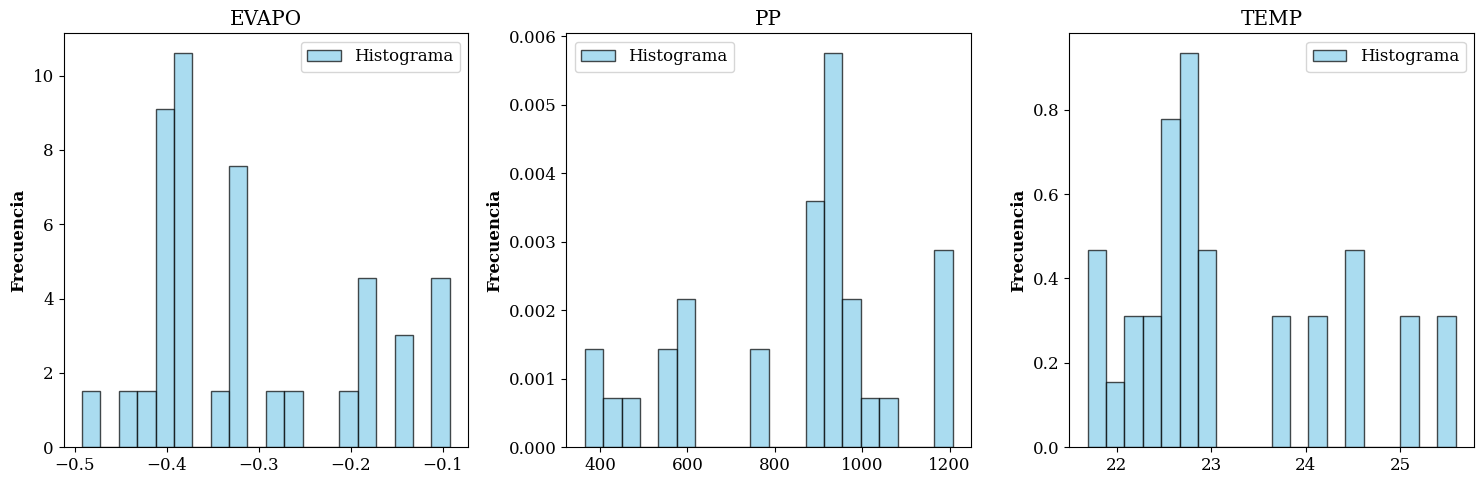

In [29]:
df = pd.read_csv(r'D:\Documents\Documents\academico\tesis_maie\data_sets\dataframe\dataframe_tesis_final_correcciones.csv')
selected_columns = ['PP', 'EVAPO', 'TEMP']
df = df[selected_columns]
# Define una función para generar los gráficos con la curva de distribución normal y el test de Shapiro-Wilk
def generate_histograms_with_normal_curve(group_df):
    # Selecciona las columnas del grupo
    group_columns = group_df.columns

    # Crea un nuevo subplot para cada columna
    fig, axes = plt.subplots(nrows=1, ncols=len(group_columns), figsize=(15, 5))

    # Genera un histograma y la curva de distribución normal para cada columna
    for i, col in enumerate(group_columns):
        data = group_df[col]
        
        # Histograma
        axes[i].hist(data, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='Histograma')
       
        
        # Curva de distribución normal
        #mean, std_dev = data.mean(), data.std()
        #x = np.linspace(data.min(), data.max(), 100)
        #pdf = stats.norm.pdf(x, mean, std_dev)
        #axes[i].plot(x, pdf, 'r-', label='Distribuion normal')
        
        # Test de Shapiro-Wilk
        stat, p_value = stats.shapiro(data)
        axes[i].set_title(col)
        #axes[i].set_title(f'{col}\nShapiro p-value: {p_value:.4f}')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia")
        axes[i].legend()

    # Ajusta el espacio entre los subplots
    plt.tight_layout()

# Agrupa las variables en grupos de tres
grouped_columns = [df.columns[i:i+3] for i in range(0, len(df.columns), 3)]

# Ordena cada grupo por la primera palabra del nombre de la variable
sorted_grouped_columns = []
for group_columns in grouped_columns:
    sorted_group_columns = sorted(group_columns, key=lambda x: x.split('_')[0])
    sorted_grouped_columns.append(sorted_group_columns)

# Genera los gráficos para cada grupo de tres variables con la curva de distribución normal y el test de Shapiro-Wilk
for group_columns in sorted_grouped_columns:
    group_df = df[group_columns]
    generate_histograms_with_normal_curve(group_df)

# Muestra los gráficos
plt.show()

### Histograma - variable pendiente

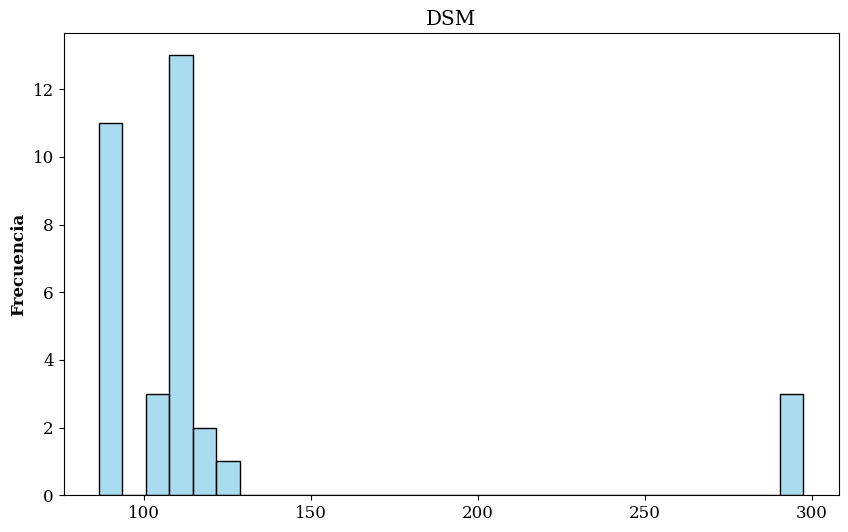

In [36]:
df = pd.read_csv(r'D:\Documents\Documents\academico\tesis_maie\data_sets\dataframe\dataframe_tesis_final_correcciones.csv')
#df.info()
# Select the independent variable (Año) for analysis
pendiente = 'DSM'

# Filter out rows with missing values in the selected independent variable
data = df.dropna(subset=[pendiente])

# Convert the independent variable column to the appropriate data type (float)
data[pendiente] = data[pendiente].astype(float)

# Descriptive statistics
statistics = data[pendiente].describe()

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=pendiente, bins=30, color='skyblue', edgecolor='black', alpha=0.7, kde=False)
plt.title(f'{pendiente}')
#plt.title(f'Distribucion variable independiente')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

### Test de Shapiro-wilk de la distribucion de las variables

In [22]:
# Crea un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Variable', 'Shapiro-Wilk', 'Comentario'])

# Itera a través de las columnas del DataFrame
for col in df.columns:
    data = df[col]
    
    # Realiza el test de Shapiro-Wilk
    stat, p_value = stats.shapiro(data)
    
    # Comentario basado en el p-valor
    if p_value < 0.05:
        comentario = 'No pasa el test (no es normal)'
    else:
        comentario = 'Pasa el test (aproximadamente normal)'
    
    # Agrega los resultados a la tabla
    results_df = results_df.append({'Variable': col, 'Shapiro-Wilk': p_value, 'Comentario': comentario}, ignore_index=True)

# Ordena la tabla por el valor del test de mayor a menor
results_df = results_df.sort_values(by='Shapiro-Wilk', ascending=False)

# Muestra la tabla
#print(results_df)


C:\Users\dncarcedo\AppData\Local\Temp\ipykernel_11212\1243055927.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': col, 'Shapiro-Wilk': p_value, 'Comentario': comentario}, ignore_index=True)
C:\Users\dncarcedo\AppData\Local\Temp\ipykernel_11212\1243055927.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': col, 'Shapiro-Wilk': p_value, 'Comentario': comentario}, ignore_index=True)
C:\Users\dncarcedo\AppData\Local\Temp\ipykernel_11212\1243055927.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': col, 'Shapiro-Wilk': p_value, 'Comentario': comentario}, ignore_index=True)


## Matriz de correlación 

- Las matrices de correlación tienen el inconveniente de tener un tamaño notable cuando se dispone de muchas variables. Para facilitar la #identificación de pares de variables con correlaciones altas, es conveniente convertirlas en formato de tabla larga (tidy).

In [30]:
df = pd.read_csv(r'D:\Documents\Documents\academico\tesis_maie\data_sets\dataframe\dataframe_tesis_final_correcciones.csv')
df = df.drop(columns = ["Año", "Lote","DSM", "PP", "EVAPO", "TEMP"])
#df.info()

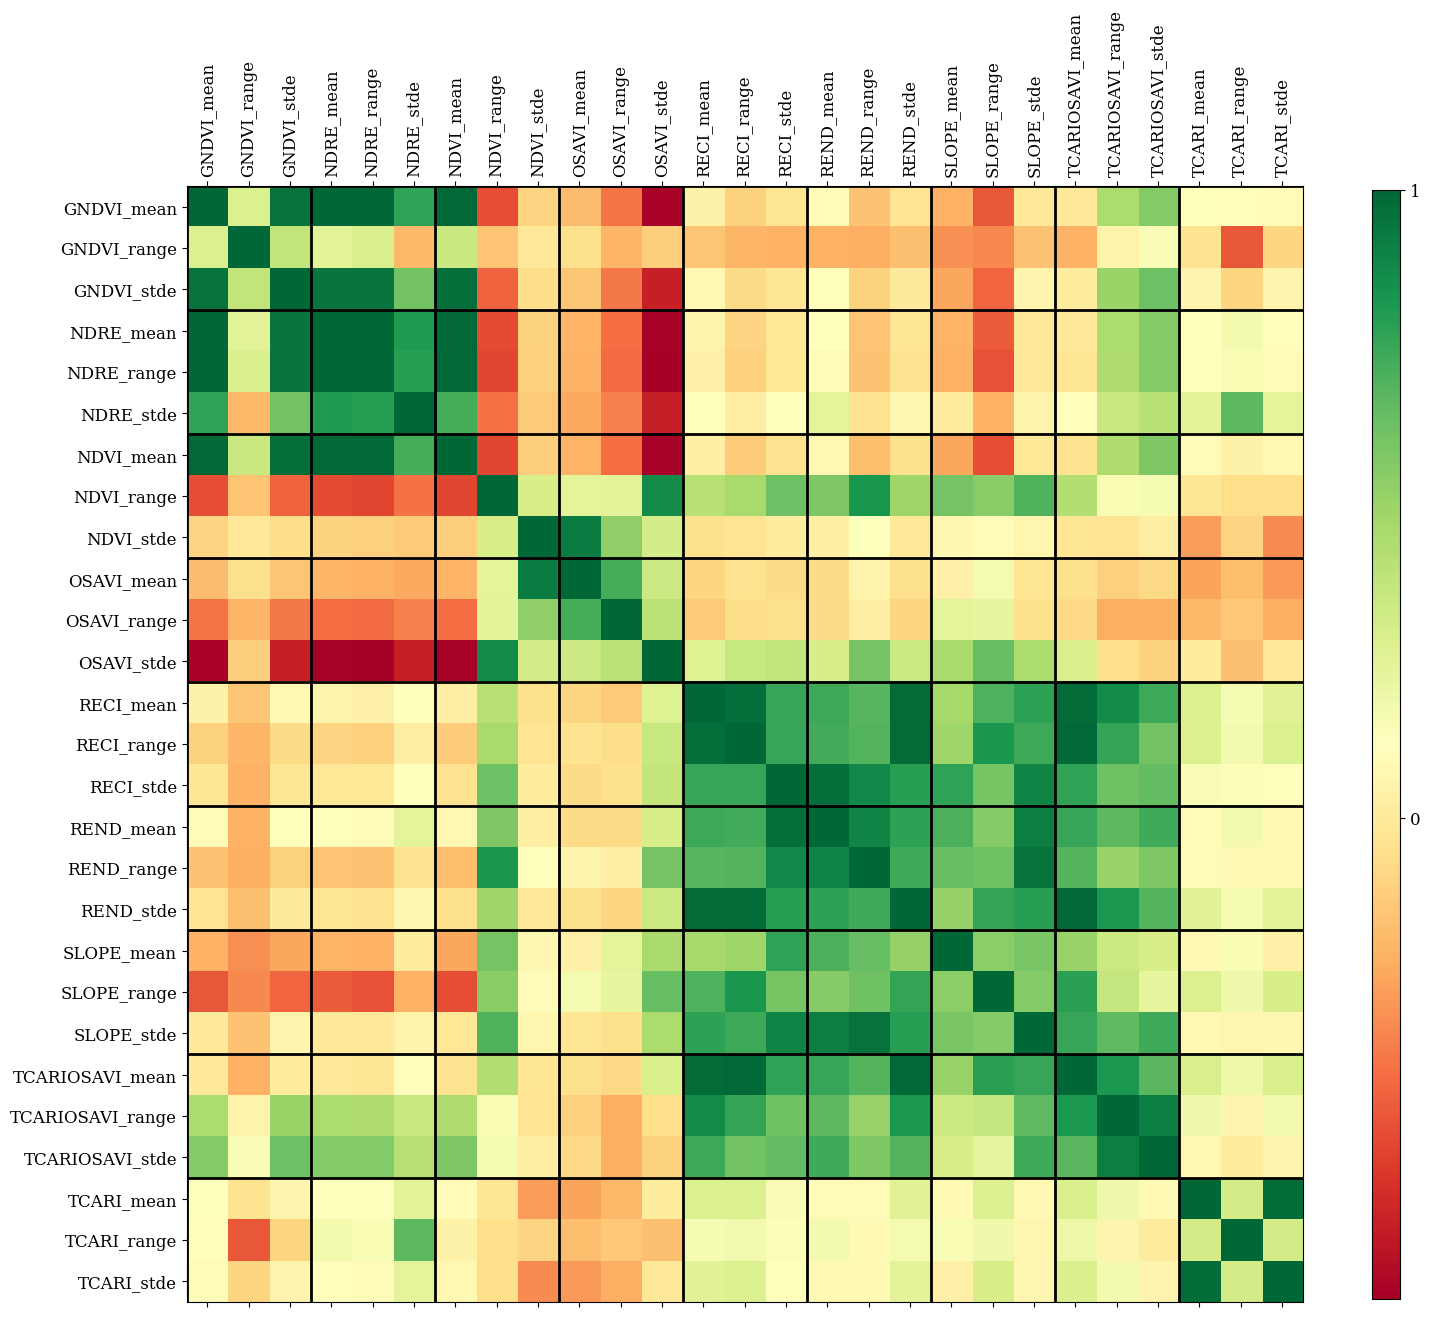

In [31]:
#Function to plot the correlation matrix of a dataframe.

def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix with columns sorted by their names
    sorted_columns = sorted(corr.columns)
    sorted_corr = corr[sorted_columns].reindex(sorted_columns)
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), sorted_corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), sorted_corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    
    # Highlight lines every 3 cells
    for i in range(0, len(sorted_corr.columns), 3):
        plt.axvline(x=i - 0.5, color='k', linewidth=2)
        plt.axhline(y=i - 0.5, color='k', linewidth=2)

        
X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)

plot_corr(df, size=18)  

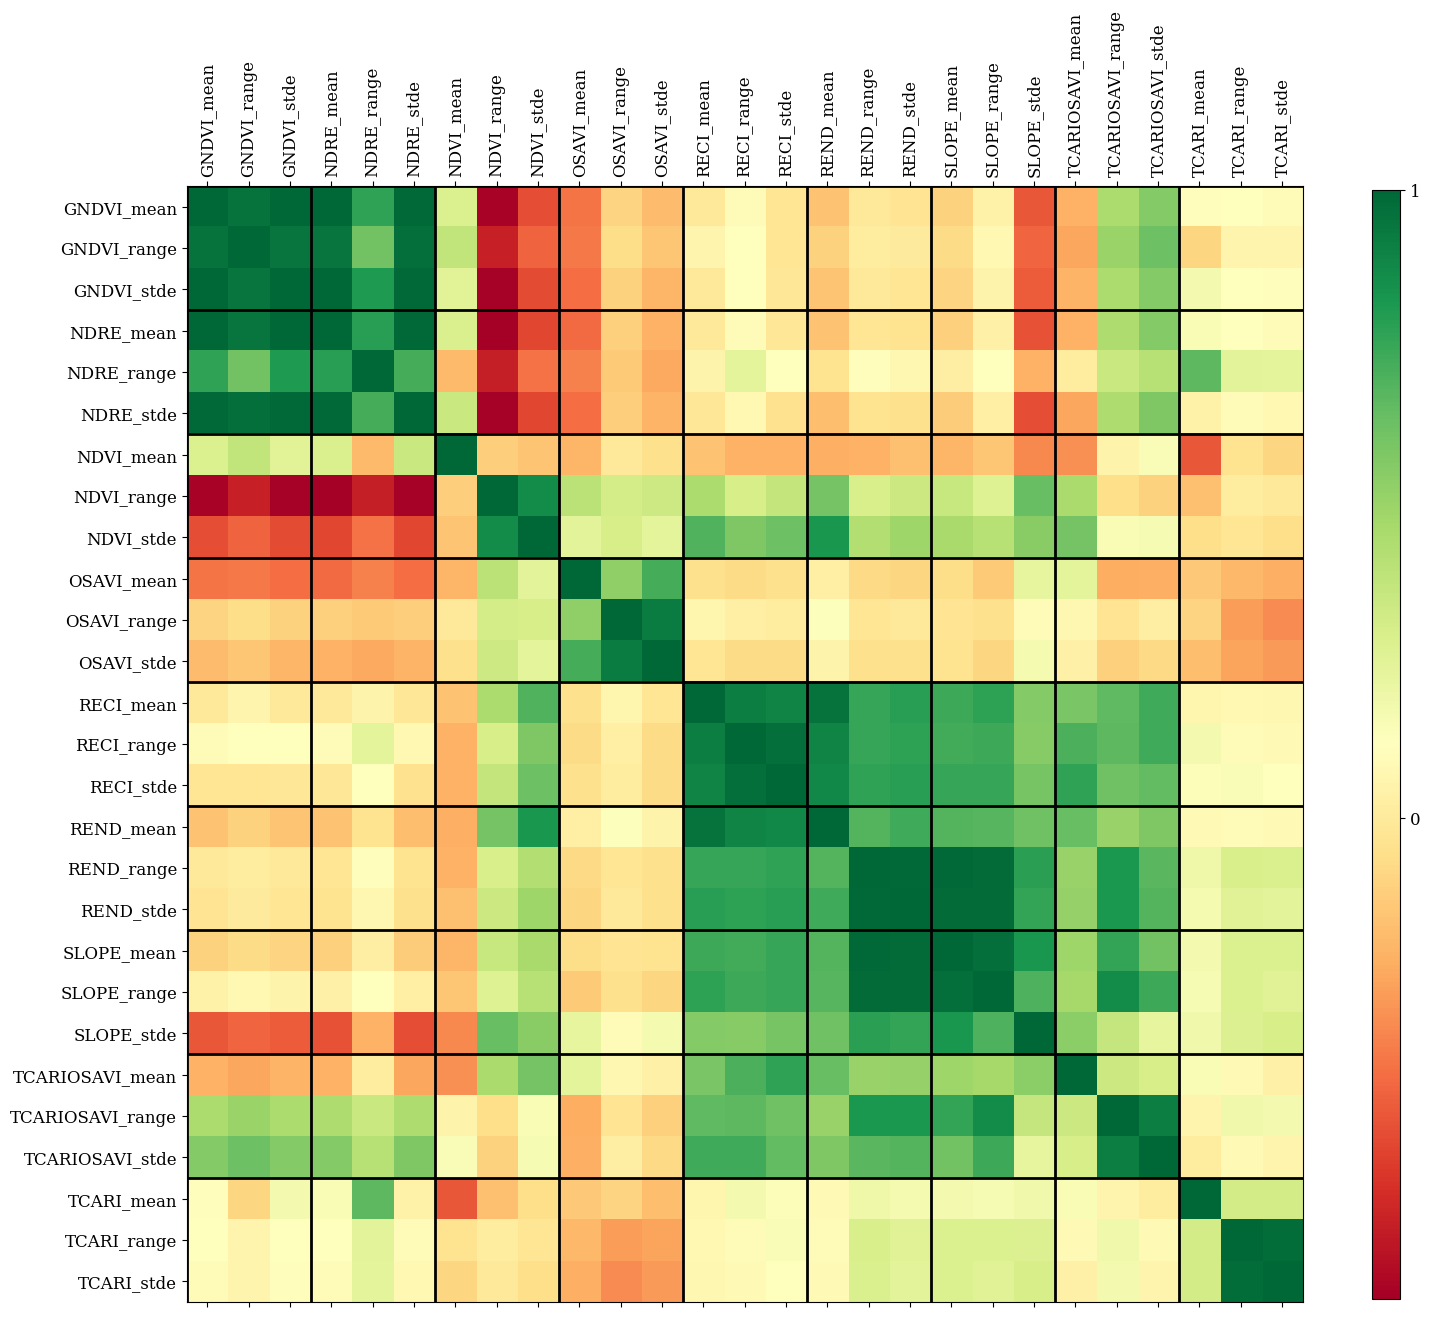

In [32]:
# Two pass clustering
# 1-We cluster the corr matrix
#   We sort the survey data according to this clustering
# 2-For cluster bigger than a threshold we cluster those sub-clusters

cluster_th = 4
#df = df.reindex(columns=columns)
X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df = df.reindex(columns=columns)

#df = df.reindex_axis(columns, axis=1)

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex(columns, axis=1)

plot_corr(df, 18)

### Análisis de la correlación lineal entre las variables 

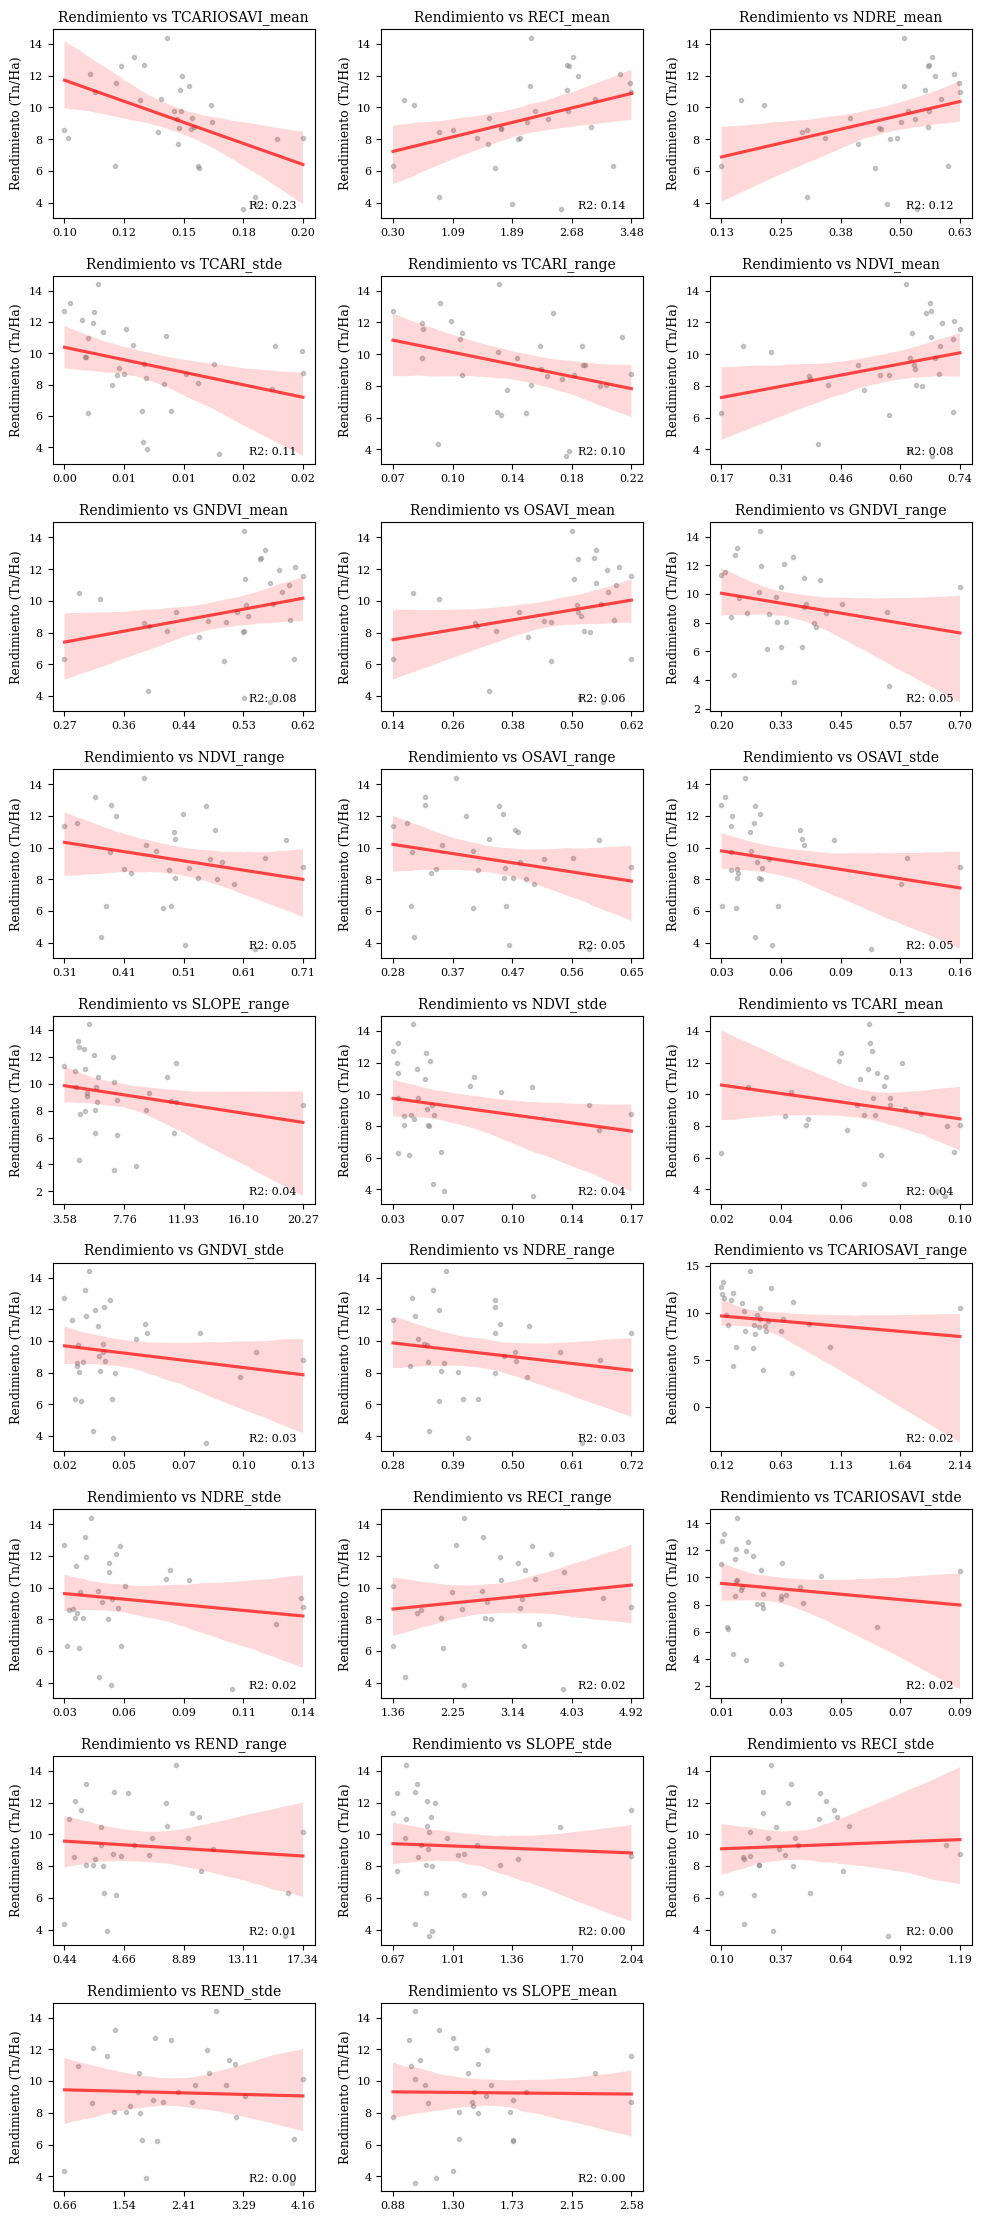

In [42]:
# Calculate correlations with 'Rend_media' and sort by absolute value
correlations = df.select_dtypes(include=['float64']).drop('REND_mean', axis=1).apply(lambda x: x.corr(df['REND_mean'])).abs().sort_values(ascending=False)

# Get the columns in the order of correlation (from high to low)
columnas_numeric = correlations.index

#columnas_numeric = df.select_dtypes(include=['float64']).columns
#columnas_numeric = columnas_numeric.drop('Rend_media')

# Calculate the number of plots needed
num_plots = len(columnas_numeric)

# Calculate the number of rows and columns for subplots
num_rows = (num_plots + 2) // 3  # 3 columns and variable number of rows
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 22))
axes = axes.flat

# Loop through numeric columns and create scatter plots
for i, column in enumerate(columnas_numeric):
    row, col = divmod(i, num_cols)
    
    # Scatter plot
    sns.regplot(
        x=df[column],
        y=df['REND_mean'],
        color="gray",
        marker='.',
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "r", "alpha": 0.7},
        ax=axes[i]
    )
    
    # Calculate the R-squared value
    slope, intercept, r_value, p_value, std_err = linregress(df[column], df['REND_mean'])
    r_squared = r_value**2
    
    # Set x-ticks based on data range
    x_min, x_max = df[column].min(), df[column].max()
    x_tick_values = np.linspace(x_min, x_max, 5)  # Adjust the number of ticks as needed
    
    # Configure x-ticks and labels
    axes[i].set_xticks(x_tick_values)
    axes[i].set_xticklabels(["{:.2f}".format(val) for val in x_tick_values])
    
    # Format y-axis labels with commas
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Rendimiento (Tn/Ha)", fontsize=9, fontweight="normal")  
    
     # Plot title with R-squared value
    title = f"Rendimiento vs {column}"
    axes[i].set_title(title, fontsize=10, fontweight="normal")
    
    # Add R2 value as text inside the subplot
    axes[i].text(
        0.75, 0.05,  # Adjust the position of the text as needed
        f"R2: {r_squared:.2f}",
        transform=axes[i].transAxes,
        fontsize=8,
        color="k",
        fontweight="normal"
    )

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

### Cálculo del coeficiente de Spearman

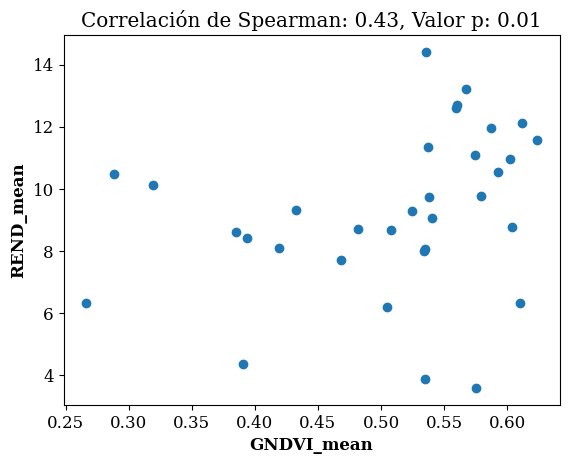

Hay una correlación significativa de Spearman de 0.43.


In [43]:
df = pd.read_csv(r'D:\Documents\Documents\academico\tesis_maie\data_sets\dataframe\dataframe_tesis_final_correcciones.csv')
#df.info()

# Seleccionar las columnas relevantes para el análisis (por ejemplo, GNDVI_mean y Rend_media)
x = df['GNDVI_mean']
y = df['REND_mean']

# Calcular el coeficiente de correlación de Spearman y el valor p
corr_spearman, p_value = spearmanr(x, y)

# Graficar la relación entre las dos variables
plt.scatter(x, y)
plt.xlabel('GNDVI_mean')
plt.ylabel('REND_mean')
plt.title(f'Correlación de Spearman: {corr_spearman:.2f}, Valor p: {p_value:.2f}')
plt.show()

# Interpretación del resultado
if p_value < 0.05:
    print(f'Hay una correlación significativa de Spearman de {corr_spearman:.2f}.')
else:
    print('No se encontró una correlación significativa.')


### Matriz de correlación de Spearman de las variables medias

C:\Users\dncarcedo\AppData\Local\Temp\ipykernel_4216\4020830099.py:65: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout (rect=[0, 0, 0, 0.95])


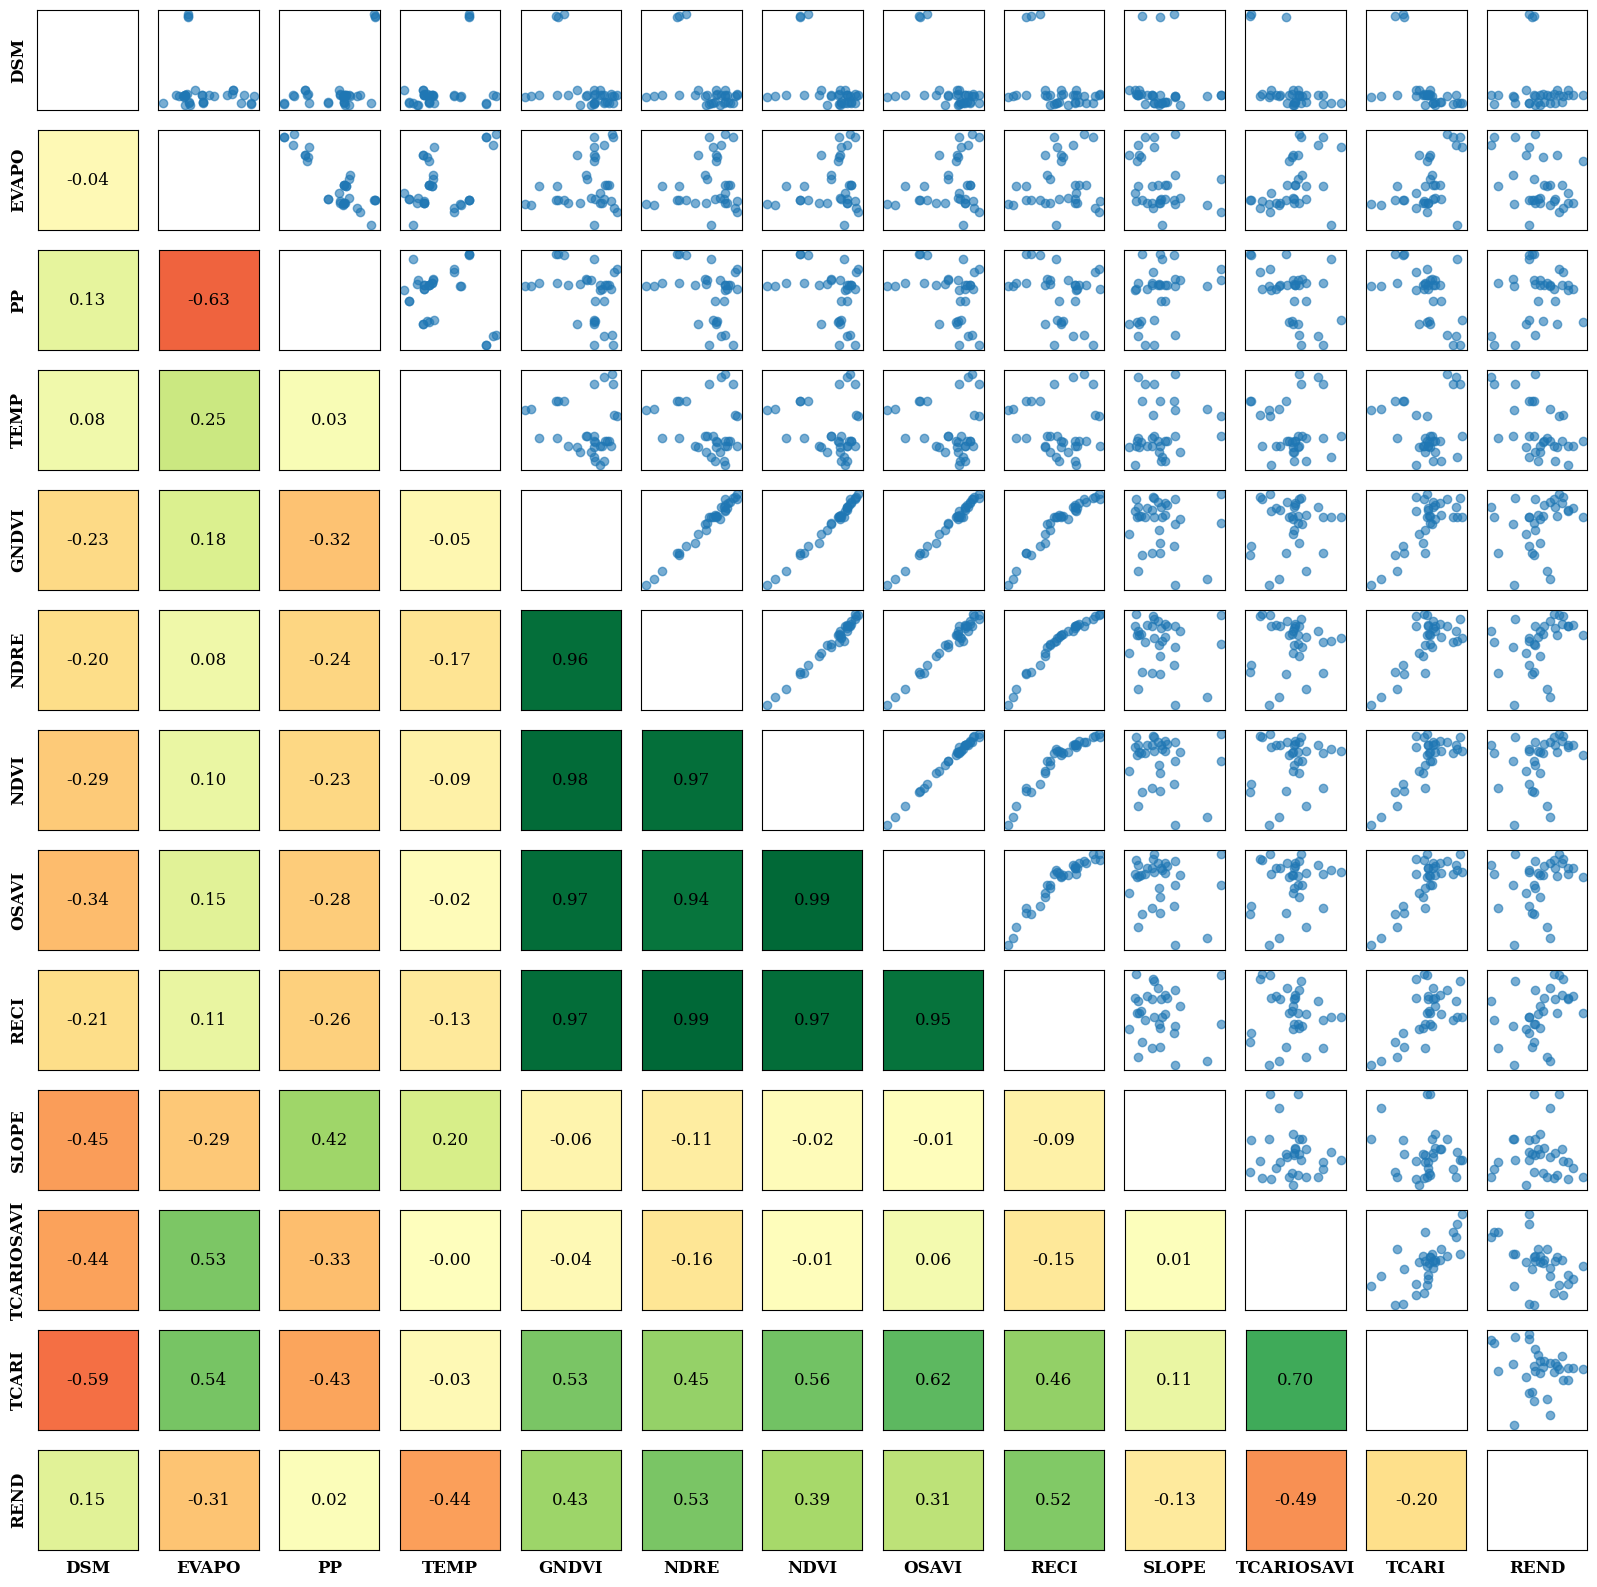

In [49]:
df = pd.read_csv(r'D:\Documents\Documents\academico\tesis_maie\data_sets\dataframe\dataframe_tesis_final_correcciones.csv')
df = df.drop(columns = ['Lote', 'Año',
                        'REND_stde', "REND_range",
                        'NDRE_stde', 'NDRE_range', 
                       'SLOPE_stde','SLOPE_range', 
                       'GNDVI_stde', 'GNDVI_range',
                        'NDVI_stde', 'NDVI_range', 
                       'OSAVI_stde', 'OSAVI_range',
                       'RECI_stde', 'RECI_range',
                       'TCARIOSAVI_stde', 'TCARIOSAVI_range', 
                       'TCARI_stde', 'TCARI_range', ])
df.columns = df.columns.str.replace('_mean', '')
column_names = df.columns


# Obtener la lista de nombres de las columnas
#column_names = df.columns
num_columns = len(column_names)

# Calcular el número de filas y columnas para la disposición de subplots
num_rows = num_columns
num_cols = num_columns

# Crear una figura grande con subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Eliminar etiquetas y títulos de los subplots
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Crear scatter plots y calcular correlaciones en los subplots
for i in range(num_rows):
    for j in range(num_cols):
        if i == j:
            # No hacer scatter plot en la diagonal principal
            continue
        if i < j:
            # Crear scatter plot en la mitad inferior izquierda
            x = df[column_names[j]]
            y = df[column_names[i]]
            axes[i, j].scatter(x, y, alpha=0.6)
        else:
            # Calcular la correlación de Spearman en la mitad superior derecha
            x = df[column_names[j]]
            y = df[column_names[i]]
            corr_spearman, _ = spearmanr(x, y)
            # Crear heatmap con gradiente de colores basado en la correlación
            cmap = plt.get_cmap('RdYlGn')
            im = axes[i, j].imshow([[corr_spearman]], cmap=cmap, vmin=-1, vmax=1)
            # Añadir una barra de color a la derecha
            #cbar = fig.colorbar(im, ax=axes[i, j], orientation='vertical')
            #cbar.set_label('Correlación de Spearman')
            axes[i, j].text(0, 0, f'{corr_spearman:.2f}', color='black',
                            fontsize=12, ha='center', va='center')

# Establecer etiquetas de los ejes para la figura completa
for i, col_name in enumerate(column_names):
    axes[num_rows - 1, i].set_xlabel(col_name)
    axes[i, 0].set_ylabel(col_name)

# Ajustar el espaciado entre los subplots
plt.tight_layout (rect=[0, 0, 0, 0.95])

# Título del gráfico
#plt.suptitle('Matriz de Correlación de Spearman', fontsize=16)

# Mostrar la figura
plt.show()